# Visualizing data using matlplotlib

__*We will not look at 3D plots!*__

Different type of data:
- Qualitative or Quantitatif
- Discrete or Continuous

These different type of data will have different ways of visualization and different kind of colormaps.

Also, depending of what type of variable is looked at and what interpretation from the data is necessary, different kind of visualization are necessary.

1. How to look at the evolution of a variable

Examples:
- Number of cells over time
- Neural activity over time
- Position over time
- [...]

2. How to look at a distribution

Example:
- Measure on a population

3. How to compare two distributions

Example:
- Comparison of some measurement on two different populations

4. How to look at the distribution of two measurements

5. How to look at the distribution of more than two measurements (next classes)

In [82]:
import matplotlib.pyplot as plt

There are multiple ways to create plots in matplotlib. We will show these different ways using the plot of a line as an example.

So first, let's create the data to plot:

In [83]:
import numpy as np
Y = np.sin(np.linspace(-np.pi, 2*np.pi, 30))

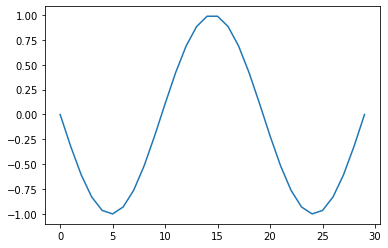

In [84]:
plt.plot(Y)

We are ploting what we want but, the `x` values are not the correct ones (in $[0, 100]$ instead of $[-\pi, 2\pi]$).

The reason is that we are only giving the `y` axis values (note that they are indeed ranging in $[-1, 1]$). So let's give the `x` values:

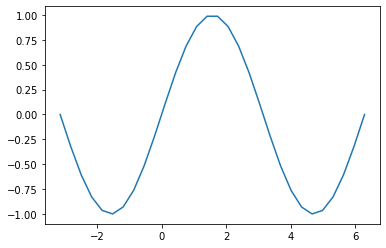

In [85]:
X = np.linspace(-np.pi, 2*np.pi, 30)
Y = np.sin(X)
plt.plot(X, Y)

Matplotlib, by default shows us such data as blue lines between datapoints. We can change that and show only the measured points in red:

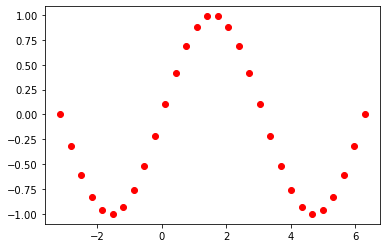

In [86]:
plt.plot(X, Y, marker='o', linestyle='', color='red')

You can find all the different kind of markers, linestyles and colors in the [cheatsheet](https://github.com/matplotlib/cheatsheets#cheatsheets) mentioned before.

Moreover, matplotlib is "nice" and, because the marker, linestyle and color are properties that are often changed they allow an easier way to modify them:

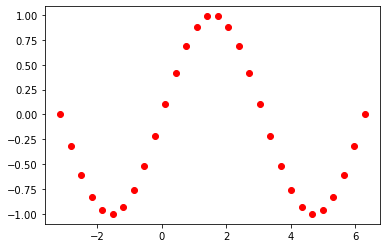

In [87]:
plt.plot(X, Y, 'or')

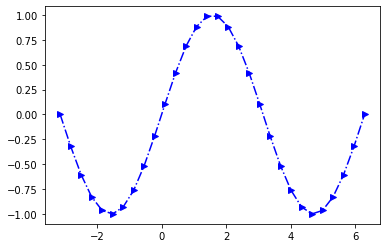

In [88]:
plt.plot(X, Y, 'b-.>')

There is a very large number of parameters for the plots, we will not go through them all here but we will some of them along this course.

Now, calling the plot function directly from matplotlib can sometimes be convenient but it has some disadvantages.
One of the main disadvantage is that all the parameters that are not specified are filled with default values.
For example is the size of the figure.

Another way to create a figure in a more explicit way is the following:

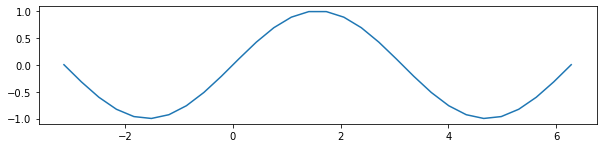

In [94]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(aspect=1)
ax.plot(X, Y)

One slightly more compact way to write the lines above is the following:

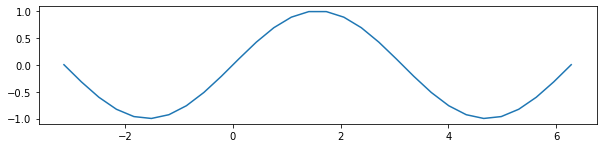

In [96]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)

It is then possible to access many parameters of the subplot `ax` in the figure `fig`.
For example, we can change the minimum and maximum value of the `x` axis with `ax.set_xlim`, change the label of the `y` axis with `ax.set_ylabel`:

Text(0, 0.5, 'Values')

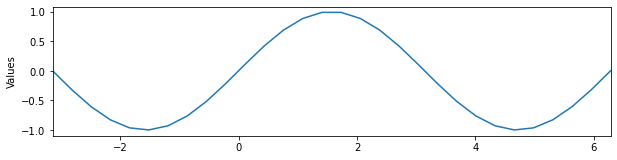

In [97]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)
ax.set_xlim(-np.pi, 2*np.pi)
ax.set_ylabel('Values')

The figures generated by matplotlib have a very specific organisation that is good ot keep in mind when one wants to precisely build a plot, here is its anatomy (this is taken from Nicolas Rougier's book, [there](https://github.com/rougier/scientific-visualization-book/blob/master/code/anatomy/anatomy.py)):

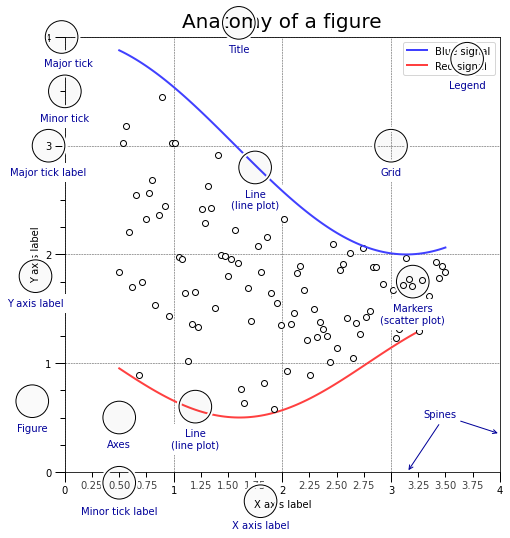

In [79]:
%run Resources/anatomy.py

## Exercise 1
Build a plot that is fully "legended"

In [98]:
# Do that here

> Side note, it is sometimes useful to have access to mathematical characters for example to display units. Matplotlib allows to do that using the [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating:
> 
> You can put a `r` before the string and use the usual [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) formating like that for example:

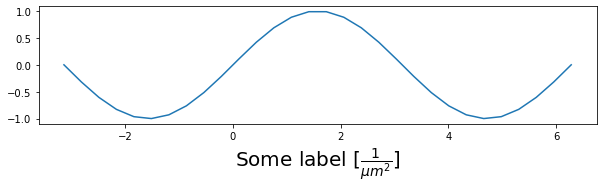

In [115]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'aspect':1})
ax.plot(X, Y)
ax.set_xlabel(r'Some label $[\frac{1}{\mu m^2}]$', size=20);

## Multiple plots

If you want to display multiple plots within the same figure, it is of course possible too. The `plt.subplots` parameters `nrows` and `ncols` are there for that:

(3, 2)


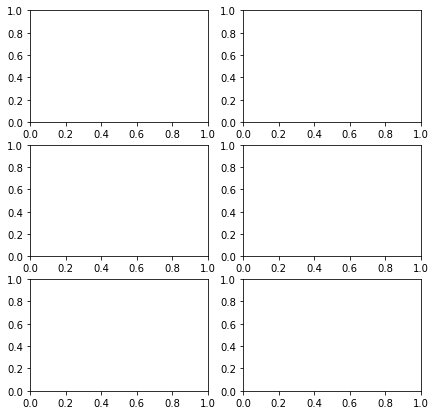

In [116]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
print(ax.shape)

Now, let's say that we have two time series recorded at two different times `X1` and `X2`. We can plot them under each other to compare them:

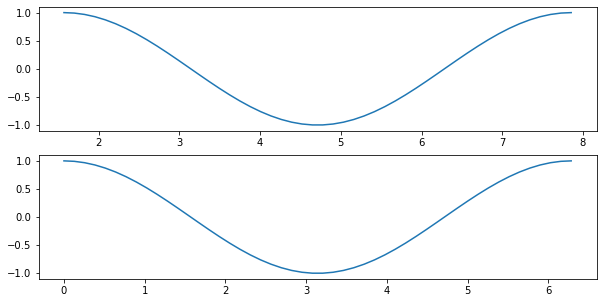

In [132]:
X1 = np.linspace(np.pi/2, 5*np.pi/2)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1)
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')

The problem here is that the two curves look similar because they are plotted on a different `x` axis. There would be multiple ways to make different curves look similar using different `x` or `y` minimum and maximum values:

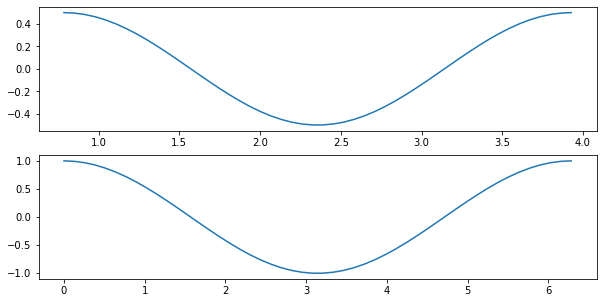

In [135]:
X1 = np.linspace(np.pi/4, 5*np.pi/4)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')

In order to keep the `x` and `y` axis similar across subplots, one can either do it manually using the `ax.set_x[y]lim` function or one can use the `sharex` and `sharey` parameters:

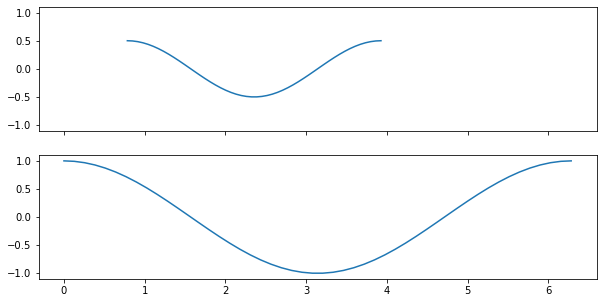

In [137]:
X1 = np.linspace(np.pi/4, 5*np.pi/4)
X2 = np.linspace(0, 2*np.pi)
Y1 = np.sin(X1*2)/2
Y2 = np.cos(X2)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), sharex=True, sharey=True)
ax[0].plot(X1, Y1, '-')
ax[1].plot(X2, Y2, '-')